In [6]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from causalnex.structure.notears import from_pandas
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
sys.path.append(os.path.abspath(os.path.join('../scripts')))


In [3]:
from ml import Ml
from clean_data import CleanData
from preprocess import Preprocess
from plot import Plot
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('../data/16_features.csv', index_col=[0])

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.703140,0.731113,0.273811,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462
1,1,0.643144,0.272574,0.615783,0.501591,0.203608,0.348757,0.125660,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590
2,1,0.601496,0.390260,0.595743,0.449417,0.462512,0.635686,0.162922,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706
3,1,0.210090,0.360839,0.233501,0.102906,0.565604,0.522863,0.038155,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000
4,1,0.629893,0.156578,0.630986,0.489290,0.463918,0.518390,0.163688,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500


# splitting data

In [41]:
from sklearn.model_selection import train_test_split
split = int(len(df) * 0.7)
train = df[:split]
test = df[split:]

# Create a causal graph using all training data 

In [43]:
sm = from_pandas(train)

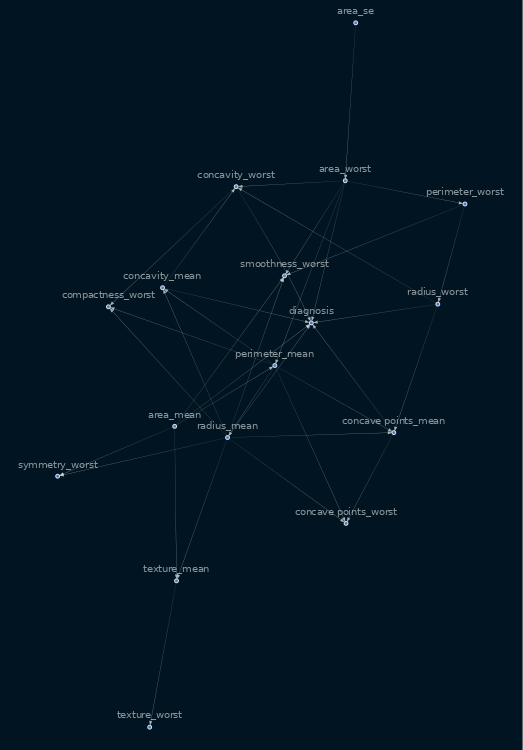

In [45]:
sm = from_pandas(train, tabu_parent_nodes=['diagnosis'])
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model.png"
viz.draw(filename)
Image(filename)

- the above graph will be the groud truth to compare with others

## 60%

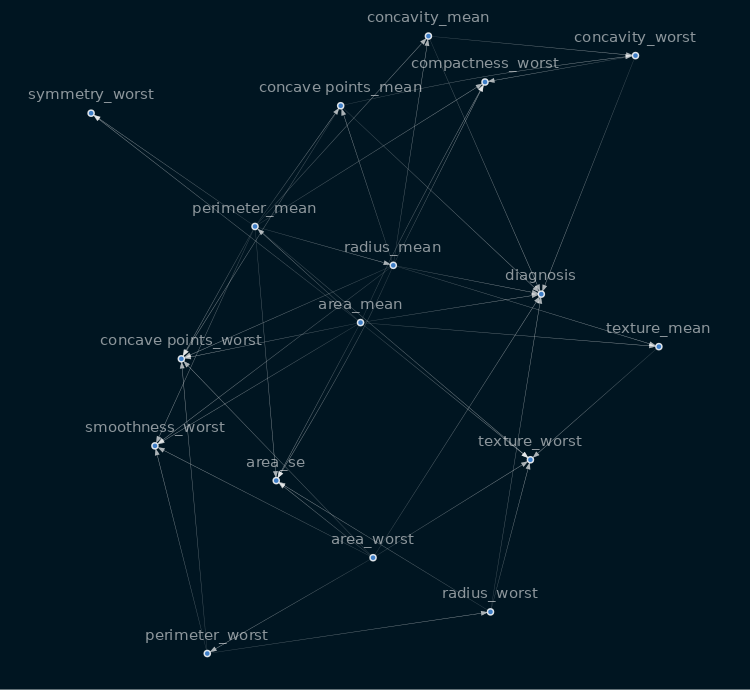

In [46]:
x_frac = train.sample(frac=0.6)
sm1 = from_pandas(x_frac, tabu_parent_nodes=['diagnosis'])
sm1.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm1,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model_new.png"
viz.draw(filename)
Image(filename)

## 70%

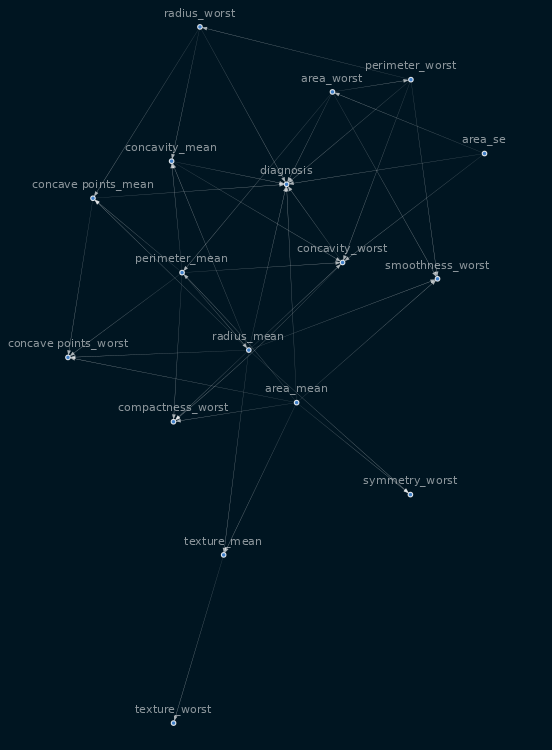

In [47]:
x_frac = train.sample(frac=0.7)
sm2 = from_pandas(x_frac, tabu_parent_nodes=['diagnosis'])
sm2.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model_new2.png"
viz.draw(filename)
Image(filename)

## 80%

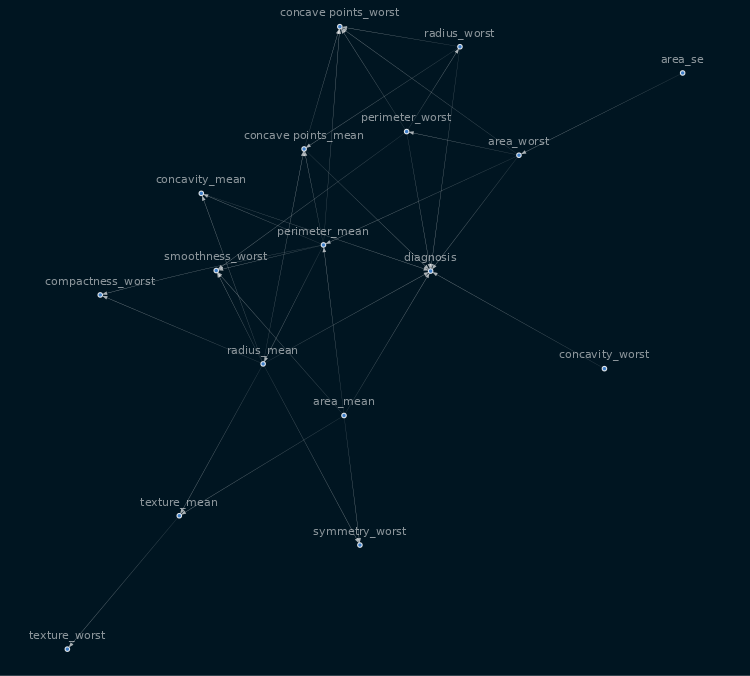

In [48]:
x_frac = train.sample(frac=0.8)
sm3 = from_pandas(x_frac, tabu_parent_nodes=['diagnosis'])
sm3.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm3,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model_new3.png"
viz.draw(filename)
Image(filename)

## 90%

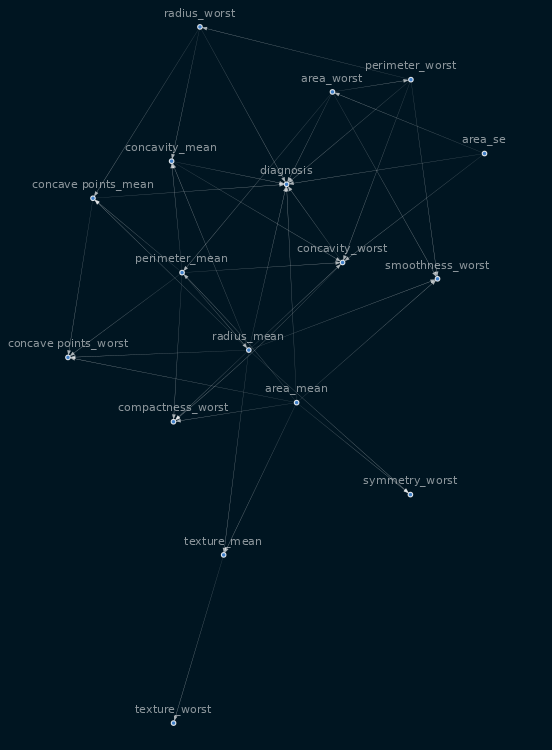

In [49]:
x_frac = train.sample(frac=0.9)
sm4 = from_pandas(x_frac, tabu_parent_nodes=['diagnosis'])
sm4.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model_new4.png"
viz.draw(filename)
Image(filename)

# calculating Jaccard Similarity Index

In [50]:
def jaccard_similarity(A, B):
    i = set(A).intersection(B)
    similarity = round(len(i)/(len(A)+len(B)-len(i)), 3)
    
    return similarity

In [51]:
similarity = jaccard_similarity(sm.edges, sm1.edges)
similarity2 = jaccard_similarity(sm.edges, sm2.edges)
similarity3 = jaccard_similarity(sm.edges, sm3.edges)
similarity4 = jaccard_similarity(sm.edges, sm4.edges)
print(similarity, similarity2, similarity3, similarity4)

0.577 0.756 0.732 0.795
